In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    GridSearchCV, cross_val_score,
    RandomizedSearchCV, cross_validate,
    StratifiedKFold
)
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("credit_card_default.csv")
df.head()

,id,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Analyse exploratoire des données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          30000 non-null  int64 
 1   limit_bal                   30000 non-null  int64 
 2   sex                         30000 non-null  object
 3   education                   30000 non-null  object
 4   marriage                    30000 non-null  object
 5   age                         30000 non-null  int64 
 6   payment_status_sep          30000 non-null  int64 
 7   payment_status_aug          30000 non-null  int64 
 8   payment_status_jul          30000 non-null  int64 
 9   payment_status_jun          30000 non-null  int64 
 10  payment_status_may          30000 non-null  int64 
 11  payment_status_apr          30000 non-null  int64 
 12  bill_statement_sep          30000 non-null  int64 
 13  bill_statement_aug          30000 non-null  in

La colonne ID identifie de manière unique chaque observation de la dataframe. Donc chaque ligne de la dataframe correspond à un seul client. Voici la signification de chaque variable (Source : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) :

- ***ID*** : Identifiant de chaque client

- ***LIMIT_BAL*** : Montant du crédit accordé en dollars taïwanais (comprend le crédit individuel et le crédit familial/complémentaire)

- ***SEX*** : Sexe (1=homme, 2=femme)

- ***EDUCATION*** : Niveau d'éducation (1=diplômé d'une école supérieure, 2=université, 3=lycée, 4=autre, 5=inconnu, 6=inconnu)

- ***MARRIAGE*** : Statut matrimonial (1=marié, 2=célibataire, 3=autre)

- ***AGE*** : Âge en années

- ***PAY_0*** : Statut de paiement en septembre 2005 (-1=paiement régulier, 1=retard de paiement d'un mois, 2=retard de paiement de deux mois, … 8=retard de paiement de huit mois, 9=retard de paiement de neuf mois et plus)

- ***PAY_2*** : Statut de paiement en août 2005 (échelle identique à celle ci-dessus)

- ***PAY_3*** : Statut de paiement en juillet 2005 (échelle identique à celle ci-dessus)

- ***PAY_4*** : Statut de paiement en juin 2005 (échelle identique à celle ci-dessus)

- ***PAY_5*** : Statut de paiement en mai 2005 (échelle identique à celle ci-dessus)

- ***PAY_6*** : Statut de paiement en avril 2005 (échelle identique à celle ci-dessus)

- ***BILL_AMT1*** : Montant de la facture en septembre 2005 (en dollars taïwanais)

- ***BILL_AMT2*** : Montant de la facture en août 2005 (en dollars taïwanais)

- ***BILL_AMT3*** : Montant de la facture en juillet 2005 (en dollars taïwanais)

- ***BILL_AMT4*** : Montant de la facture en juin 2005 (en dollars taïwanais)

- ***BILL_AMT5*** : Montant de la facture en mai 2005 (en dollars taïwanais)

- ***BILL_AMT6*** : Montant de la facture en avril 2005 (en dollars taïwanais)

- ***PAY_AMT1*** : Montant du paiement précédent en septembre 2005 (en dollars taïwanais)

- ***PAY_AMT2*** : Montant du paiement précédent en août 2005 (en dollars taïwanais)

- ***PAY_AMT3*** : Montant du paiement précédent en juillet 2005 (en dollars taïwanais)

- ***PAY_AMT4*** : Montant du paiement précédent en juin 2005 (en dollars taïwanais)

- ***PAY_AMT5*** : Montant du paiement précédent en mai 2005 (en dollars taïwanais)

- ***PAY_AMT6*** : Montant du paiement précédent en avril 2005 (en dollars taïwanais)

- ***default payment next month*** : Défaut de paiement (1=oui, 0=non)

In [5]:
df['payment_status_sep']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: payment_status_sep, Length: 30000, dtype: int64

In [6]:
# Convertir les colonnes 'sex', 'education', 'default_payment_next_month' et 'marriage' en variables catégorielles
categorical_columns = ['sex', 'marriage', 'education', 'default_payment_next_month']
df[categorical_columns] = df[categorical_columns].astype('category')

  
# Convertir les colonnes payment_status en variables ordinales
payment_order = np.arange(-2,10).tolist()
payment_categories = pd.CategoricalDtype(categories=payment_order, ordered=True)

payment_columns =  df.iloc[:,6:12].columns.tolist() 
df[payment_columns] = df[payment_columns].astype(payment_categories)

In [7]:
df['payment_status_sep']

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: payment_status_sep, Length: 30000, dtype: category
Categories (12, int64): [-2 < -1 < 0 < 1 ... 6 < 7 < 8 < 9]

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


In [9]:
df.describe(include= ['category']).T

,count,unique,top,freq
sex,30000,2,Female,18112
education,30000,4,University,14030
marriage,30000,3,Single,15964
payment_status_sep,30000,11,0,14737
payment_status_aug,30000,11,0,15730
payment_status_jul,30000,11,0,15764
payment_status_jun,30000,11,0,16455
payment_status_may,30000,10,0,16947
payment_status_apr,30000,10,0,16286
default_payment_next_month,30000,2,0,23364


In [10]:
def pct_default_by_category(df, cat_var):
  # Pourcentage de défauts de paiement
  ax = df.groupby(cat_var)["default_payment_next_month"] \
  .value_counts(normalize=True) \
  .unstack() \
  .plot(kind="barh", stacked="True")
  ax.set_title("Pourcentage de défauts de paiement",fontsize=16)
  ax.legend(title="Defaut de paiement", bbox_to_anchor=(1,1))
  plt.show()

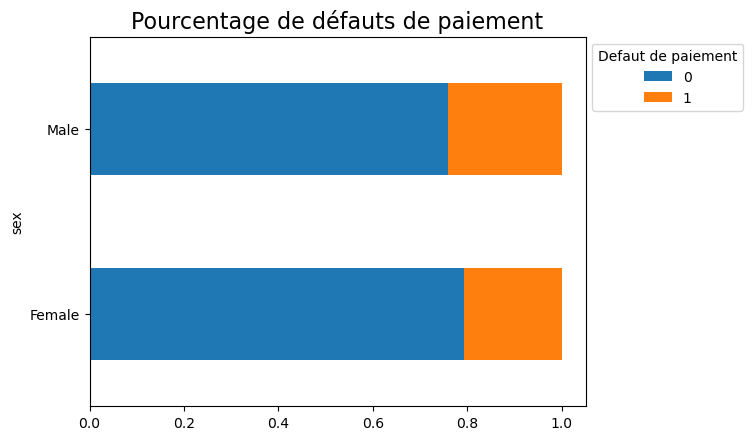

In [11]:
pct_default_by_category(df,"sex")

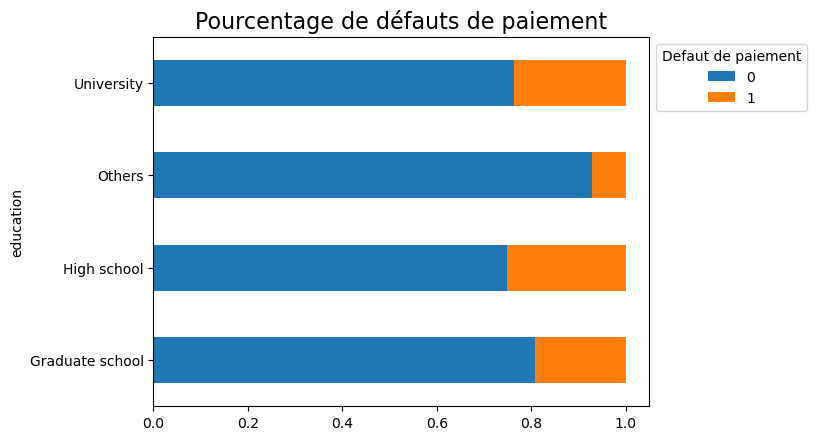

In [12]:
pct_default_by_category(df,"education")

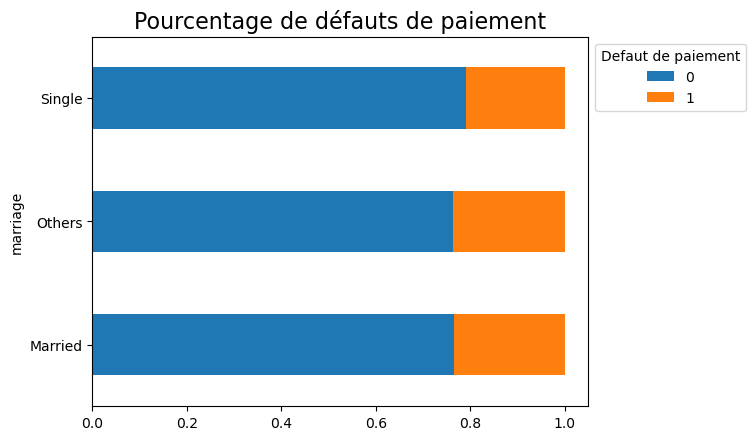

In [13]:
pct_default_by_category(df,"marriage")

In [14]:
# Matrice de corrélation
corr_mat = df[[c for c in df.columns if c not in ['id', 'sex', 'education', 'marriage']]].corr()
corr_mat

,limit_bal,age,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr
limit_bal,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
age,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
bill_statement_sep,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
bill_statement_aug,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
bill_statement_jul,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
bill_statement_jun,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
bill_statement_may,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
bill_statement_apr,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
previous_payment_sep,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
previous_payment_aug,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


### Préparation des donnée pour le modèle

In [15]:
# Séparer les caractéristiques (X) de la variable cible (y)
X = df.drop(columns=['id', 'default_payment_next_month'])
y = df['default_payment_next_month']

# Diviser les données en ensembles d'entraînement, de validation et de test
# Par exemple, 60% pour l'entraînement, 20% pour la validation et 20% pour le test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Afficher la taille des ensembles d'entraînement, de validation et de test
print("Taille de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Taille de l'ensemble de validation :", X_val.shape, y_val.shape)
print("Taille de l'ensemble de test :", X_test.shape, y_test.shape)
print("")
print("Distribution des classes dans chaque ensemble ")
print(f"Total: {y.value_counts(normalize=True).values}")
print(f"Train: {y_train.value_counts(normalize=True).values}")
print(f"Valid: {y_val.value_counts(normalize=True).values}")
print(f"Test: {y_test.value_counts(normalize=True).values}")

Taille de l'ensemble d'entraînement : (18000, 23) (18000,)
Taille de l'ensemble de validation : (6000, 23) (6000,)
Taille de l'ensemble de test : (6000, 23) (6000,)

Distribution des classes dans chaque ensemble 
Total: [0.7788 0.2212]
Train: [0.77816667 0.22183333]
Valid: [0.77966667 0.22033333]
Test: [0.77983333 0.22016667]


### Pipeline

In [16]:
cat_features = ['sex', 'education', 'marriage']

num_features = [c for c in X_train.columns if c not in cat_features]
num_features

['limit_bal',
 'age',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr',
 'bill_statement_sep',
 'bill_statement_aug',
 'bill_statement_jul',
 'bill_statement_jun',
 'bill_statement_may',
 'bill_statement_apr',
 'previous_payment_sep',
 'previous_payment_aug',
 'previous_payment_jul',
 'previous_payment_jun',
 'previous_payment_may',
 'previous_payment_apr']

In [17]:
# Création de transformateurs pour les colonnes catégorielles et numériques
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))  # Utilisation de l'encodage one-hot
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Normalisation des caractéristiques numériques
])

# Création du transformateur de colonnes en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Création du modèle 
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Création du pipeline complet 
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                 

In [18]:
# Entraînement du modèle en utilisant l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['limit_bal', 'age',
                                                   'payment_status_sep',
                                                   'payment_status_aug',
                                                   'payment_status_jul',
                                                   'payment_status_jun',
                                                   'payment_status_may',
                                                   'payment_status_apr',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                 

In [19]:
# Fonction d'évaluation des modèles
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    #print(cm)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ["Negative", "Positive"]

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 20 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle("Evaluation de la Performance du Modèle", fontsize=16)

        # plot 1: confusion matrix ----

        # preparing more descriptive labels for the confusion matrix
        cm_counts = [f"{val:0.0f}" for val in cm.flatten()]
        cm_percentages = [f"{val:.2%}" for val in cm.flatten()/np.sum(cm)]
        cm_labels = [f"{v1}\n{v2}" for v1, v2 in zip(cm_counts,cm_percentages)]
        cm_labels = np.asarray(cm_labels).reshape(2,2)

        sns.heatmap(cm, annot=cm_labels, fmt="", linewidths=.5, cmap="Greens",
                    square=True, cbar=False, ax=ax[0], annot_kws={"ha": "center", "va": "center"})
        ax[0].set(xlabel="Predicted label", ylabel="Actual label", title="Confusion Matrix")
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        # plot 2: ROC curve ----

        metrics.RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1], name="")
        ax[1].set_title("ROC Curve")
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), "ro", markersize=8, label="Decision Point")
        ax[1].plot([0, 1], [0, 1], "r--")

        if show_pr_curve:
            
            metrics.PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax[2], name="")
            ax[2].set_title("Precision-Recall Curve")

    stats = {
        "accuracy": metrics.accuracy_score(y_test, y_pred),
        "precision": metrics.precision_score(y_test, y_pred),
        "recall": metrics.recall_score(y_test, y_pred),
        "specificity": (tn / (tn + fp)),
        "f1_score": metrics.f1_score(y_test, y_pred),
        "cohens_kappa": metrics.cohen_kappa_score(y_test, y_pred),
        "matthews_corr_coeff": metrics.matthews_corrcoef(y_test, y_pred),
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "average_precision": metrics.average_precision_score(y_test, y_pred_prob)
    }

    return stats

{'accuracy': 0.8143333333333334,
 'precision': 0.6333333333333333,
 'recall': 0.37367624810892586,
 'specificity': 0.9388627618640445,
 'f1_score': 0.4700285442435775,
 'cohens_kappa': 0.36642628022840507,
 'matthews_corr_coeff': 0.38518335851490765,
 'roc_auc': 0.7706381756689018,
 'pr_auc': 0.530144714112875,
 'average_precision': 0.5266418206491454}

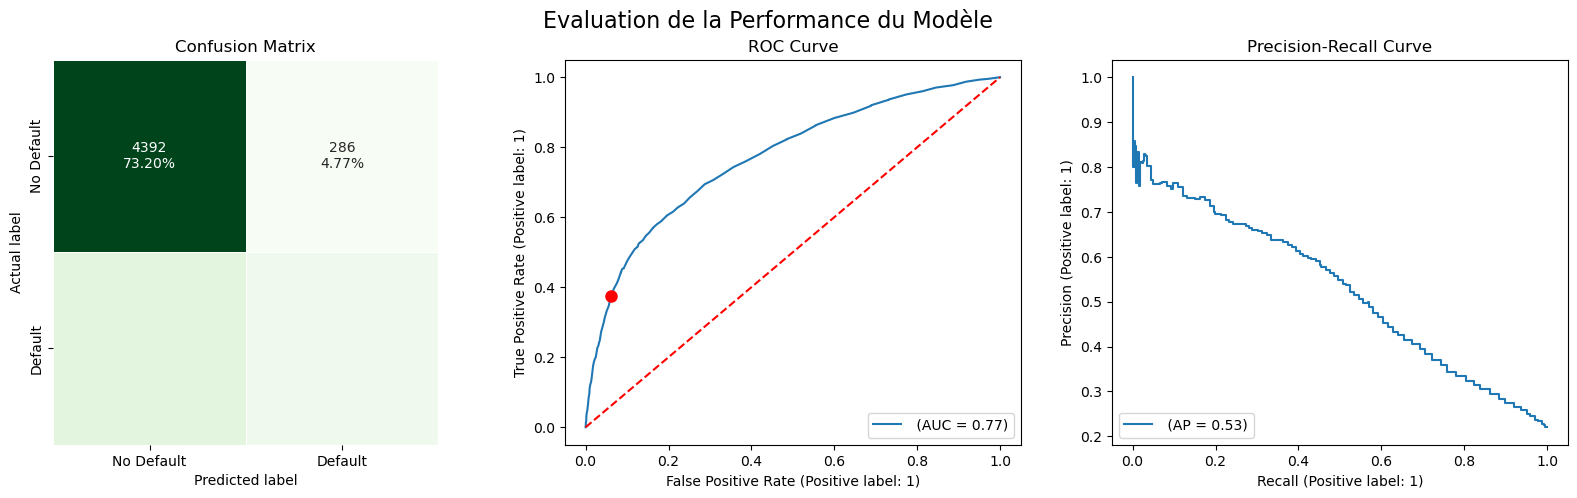

In [20]:
# Evaluation de la performance du pipeline modèle
labels = ["No Default", "Default"]
performance_evaluation_report(
    pipeline, X_val, y_val, labels=labels, 
    show_plot=True, show_pr_curve=True
)

### Optimisation du modèle par validation croisée

In [21]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

cv_scores = cross_validate(pipeline, X_train, y_train, cv=k_fold,
                           scoring=["accuracy", "precision", "recall",
                                    "roc_auc"])
pd.DataFrame(cv_scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc
0,4.058335,0.197590,0.825833,0.683084,0.399749,0.768261
1,4.108239,0.198057,0.812500,0.633406,0.365915,0.761883
2,5.531316,0.309032,0.811667,0.631808,0.362954,0.758544
3,4.806638,0.198031,0.819444,0.658174,0.387985,0.760188
4,4.046411,0.200653,0.812778,0.645012,0.347935,0.761862


### Réglage des hyperparamètres avec une recherche par grille (Grid Search)

In [22]:
# Définition de la grille de paramètres
param_grid = {
    "model__criterion": ["entropy", "gini"],
    "model__max_depth": range(7, 11),
    "model__n_estimators": [150, 200, 250]
}

In [23]:
# Recherche des meilleurs hyperparamètres
clf_gs = GridSearchCV(pipeline, param_grid,
                             scoring="accuracy", cv=k_fold,
                             n_jobs=-1, verbose=1)

clf_gs.fit(X_train, y_train)

print(f"Best parameters: {clf_gs.best_params_}")
print(f"accuracy (Training set): {clf_gs.best_score_:.4f}")
print(f"accuracy (Validation set): {metrics.accuracy_score(y_val, clf_gs.predict(X_val)):.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 9, 'model__n_estimators': 150}
accuracy (Training set): 0.8198
accuracy (Validation set): 0.8183


{'accuracy': 0.8215,
 'precision': 0.676056338028169,
 'recall': 0.3633610900832703,
 'specificity': 0.9508441974780936,
 'f1_score': 0.47267355982274745,
 'cohens_kappa': 0.37673251097459015,
 'matthews_corr_coeff': 0.40307365201024137,
 'roc_auc': 0.7797977627743526,
 'pr_auc': 0.5538917932185157,
 'average_precision': 0.554165143718492}

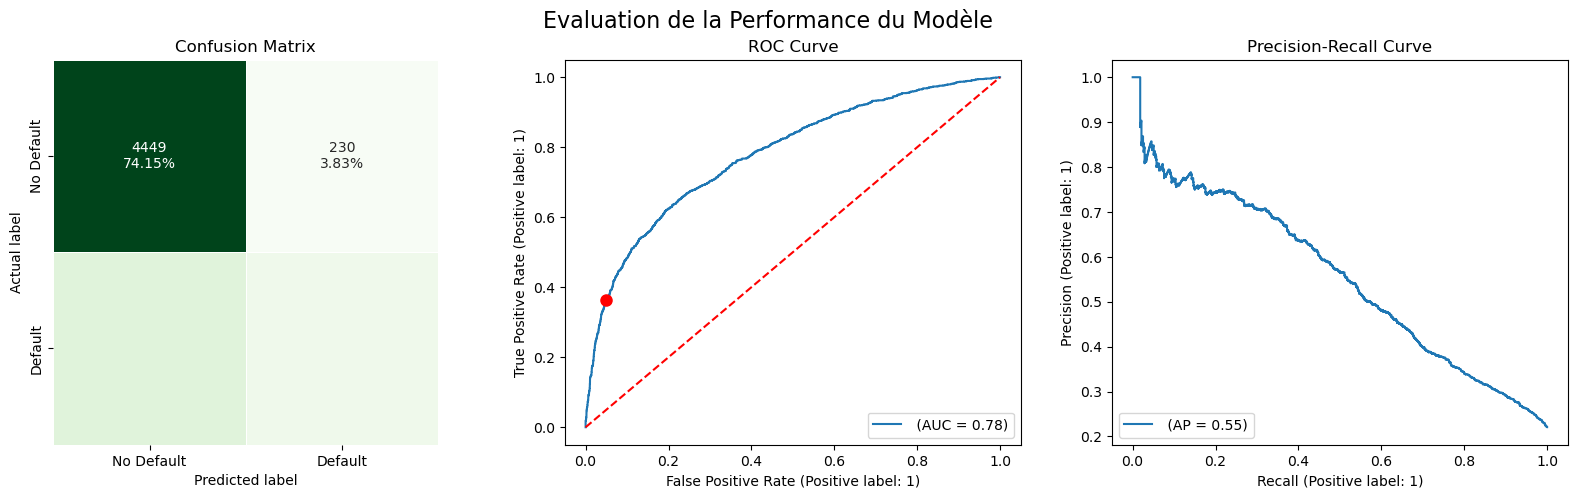

In [24]:
# Evaluation du meilleur modèle sur les données de test
labels = ["No Default", "Default"]
performance_evaluation_report(
    clf_gs, X_test, y_test, labels=labels, 
    show_plot=True, show_pr_curve=True
)

### Sauvegarde du modèle

In [30]:
import pickle
import re
from pathlib import Path

__version__ = "0.1.0"

model_filename = "classifier_model-" + __version__ + ".pkl"
with open(model_filename,'wb') as f:
    pickle.dump(clf_gs, f)

#version_ = "0.1.0"
# Enregistrez le modèle dans un fichier
#model_filename = "classifier_model.pkl"
#pickle.dump(clf_gs, model_filename)

### test du modèle sauvegardé

{'accuracy': 0.8215,
 'precision': 0.676056338028169,
 'recall': 0.3633610900832703,
 'specificity': 0.9508441974780936,
 'f1_score': 0.47267355982274745,
 'cohens_kappa': 0.37673251097459015,
 'matthews_corr_coeff': 0.40307365201024137,
 'roc_auc': 0.7797977627743526,
 'pr_auc': 0.5538917932185157,
 'average_precision': 0.554165143718492}

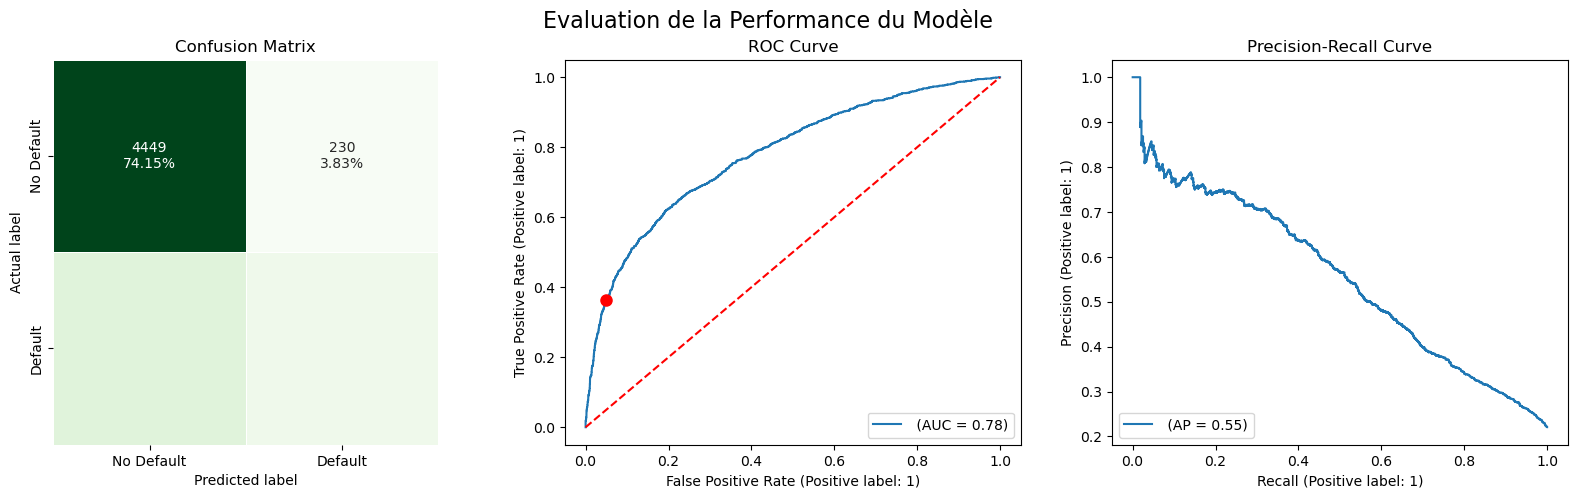

In [31]:
# Charger le modèle depuis le fichier
with open(model_filename, "rb") as f:
    loaded_model = pickle.load(f)

# Vérifier que le modèle chargé est le même que celui enregistré
performance_evaluation_report(
    loaded_model, X_test, y_test, labels=labels, 
    show_plot=True, show_pr_curve=True
)